In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [81]:
lam = 1 # Normalized wavelength
d = lam/2 # lattice constant
k = 2*np.pi/lam # wave number
k1 = k*np.array([0,-1]) # reciprocal lattice vector 1
k2 = k*np.array([np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 2
k3 = k*np.array([-np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 3

v = 3 # lattice potential

n = 8 # include (2n+1)^2 plane waves in calculation <=> calculate over (2n+1)^2 bands
m = 8 # calculate over (2m(+1))^2 quasimomenta

In [82]:
#Quasimomentum list
dn = 20
nq_list = [(x/2,0) for x in np.linspace(0,1,int(dn*np.sqrt(3)))] #Gamma => M
n_M = len(nq_list) -0.5
nq_list = nq_list + [(1/2 + x/6, x/3) for x in np.linspace(0, 1, dn)] # M -> K
n_K = len(nq_list) -0.5
nq_list = nq_list + [(2/3 - x/6, 1/3 + x/6) for x in np.linspace(0,1,dn)] #K -> X
n_X = len(nq_list) -0.5
nq_list = nq_list + [(x/2, x/2) for x in np.linspace(1, 0, int(dn*np.sqrt(3)))] # M -> Gamma
n_Gamma = len(nq_list)

Nsite=2*n+1
l_list = [(x, y) for x in np.linspace(-n, n, Nsite, dtype=np.int) for y in np.linspace(-n, n, Nsite, dtype=np.int)]
E = np.zeros([len(nq_list), Nsite**2])
C = np.zeros([Nsite**2, len(nq_list), Nsite**2], dtype = 'complex_')
H_tmp = np.zeros([Nsite**2, Nsite**2])

l_list_1 = np.array(l_list)[:, 0]
l_list_2 = np.array(l_list)[:, 1]
l2, l1 = np.meshgrid(l_list_1, l_list_1)
m2, m1 = np.meshgrid(l_list_2, l_list_2)

l_diffs_1 = l1 - l2
l_diffs_2 = m1 - m2
l_diffs = l_diffs_1 * l_diffs_2
condition_1 = (np.abs(l_diffs_1) == 1) * (m1 == m2)
condition_2 = (l1 == l2) * (np.abs(l_diffs_2) == 1)
condition_3 = (l_diffs == 1)

H_tmp[condition_1 == 1] = -v/4
H_tmp[condition_2 == 1] += -v/4
H_tmp[condition_3 == 1] += -v/4

for i_n, n in enumerate(nq_list):
    H = np.copy(H_tmp)
    K = 3 * ((n[0] + l1)**2 + (n[1] + m1)**2 - (n[0] + l2) * (n[1] + m2))
    H += ((l1 == l2) * (m1 == m2)) * K
    E0, P = np.linalg.eig(H)
    rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
    E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
    C[:, i_n, :] = np.array(tmp)

<ipython-input-82-1e301986b896>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))


Text(0.5, 1.0, '$v$=3.0[$E_R$]')

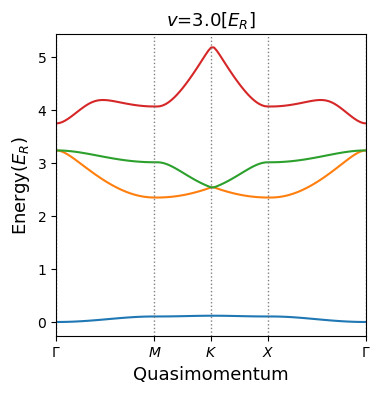

In [83]:
M_point = 1/2
K_point = 1/2+1/(2*np.sqrt(3))
X_point = 1/2+1/(np.sqrt(3))
Gamma_point = 1+1/np.sqrt(3)
nq_list_1d = np.linspace(0,M_point-M_point/(int(n_M)), int(n_M))
nq_list_1d = np.append(nq_list_1d, np.linspace(M_point, K_point-(K_point-M_point)/(int(n_K-n_M)),int(n_K-n_M)))
nq_list_1d = np.append(nq_list_1d, np.linspace(K_point, X_point-(X_point-K_point)/(int(n_X-n_K)), int(n_X-n_K)))
nq_list_1d = np.append(nq_list_1d, np.linspace(X_point, Gamma_point, int(n_Gamma-n_X+1)))

plt.figure(figsize=[4,4], dpi=100)
for i in range(4):
    plt.plot(nq_list_1d, E[:,i]-np.min(E[:,0]))
plt.xlim(0,1/+2+np.sqrt(3)/2)
# plt.ylim(-1,1)
plt.xlabel('Quasimomentum', fontsize=13)
plt.ylabel(r'Energy($E_R$)', fontsize=13)
plt.xticks([0,M_point,K_point,X_point, Gamma_point],[r"$\Gamma$",r"$M$", r"$K$",r"$X$", r"$\Gamma$"])
for x in [0,M_point,K_point,X_point,Gamma_point]:
    plt.axvline(x,c='gray',ls=':',lw=1)
title = r'$v$'
plt.title(title+'={:.1f}[$E_R$]'.format(v), fontsize=13)

In [84]:
band = 0 # band index
quasi = np.int(0) # 0=>Gamma, n_M => M, n_K => K
n = nq_list[quasi]
H = np.copy(H_tmp)
K = 3 * ((n[0] + l1)**2 + (n[1] + m1)**2 - (n[0] + l2) * (n[1] + m2))
H += ((l1 == l2) * (m1 == m2)) * K
E0, P = np.linalg.eig(H)
x = np.arange(-2.2,2.2,0.02)
y = np.arange(-2.2,2.2,0.02)
X,Y = np.meshgrid(x,y)
Z = list(map(lambda x,y: np.abs(np.sum(list(map(lambda l1: np.sum(list(map(lambda l2: P[Nsite*l1+l2,np.argmin(E0)]*np.exp(4*np.pi/np.sqrt(3)*1.j*(n[0]+(l1-(Nsite-1)/2)*x+(n[1]+l2-(Nsite-1)/2)*(-1/2*x+np.sqrt(3)/2*y))),range(Nsite))), axis=0), range(Nsite))), axis=0))**2, X,Y))

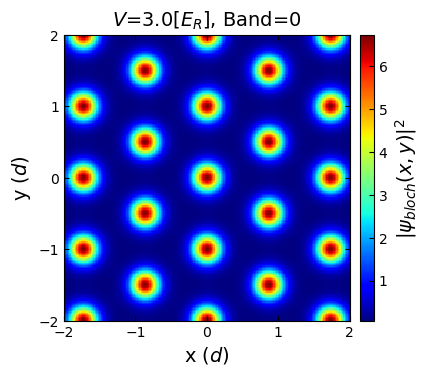

In [85]:
fig = plt.figure(figsize=[4,4], dpi=100)
ax = fig.add_subplot(1,1,1)
mappable = ax.pcolormesh(X,Y,Z, cmap='jet',shading='auto')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'x ($d$)', fontsize=14)
ax.set_ylabel(r'y ($d$)', fontsize=14)
ax.tick_params(which='both',top='true', right='true', direction='in')
ax.xaxis.set_ticks([-2,-1,0,1,2])
ax.yaxis.set_ticks([-2,-1,0,1,2])
title = r'$V$'
ax.set_title(title+'={:.1f}[$E_R$]'.format(v)+', Band=%.d'%(band), fontsize=14)

divider1 = make_axes_locatable(ax)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.1)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.set_label(r"$|\psi_{bloch}(x,y)|^2$", fontname="Arial", fontsize=14)
pp.ax.tick_params(direction='in')


In [142]:
lattice_site_num = 3*7*2+1

n1_list = np.linspace(-1.5,1.5,lattice_site_num)
n2_list = np.linspace(-1.5,1.5,lattice_site_num)



n1_mesh,n2_mesh = np.meshgrid(n1_list,n2_list, indexing='ij')

In [143]:
condition1 = (-1 < 2*n1_mesh -n2_mesh)*(2*n1_mesh -n2_mesh <= 1)
condition2 = (-(2-np.abs(2*n1_mesh-n2_mesh)) < 3*n2_mesh)*(3*n2_mesh <= (2-np.abs(2*n1_mesh-n2_mesh)))

In [144]:
n1_mesh_first_BZ = np.where((condition1*condition2), n1_mesh, np.nan)
n2_mesh_first_BZ = np.where((condition1*condition2), n2_mesh, np.nan)

kx_mesh_first_BZ = n1_mesh_first_BZ*4*np.pi/np.sqrt(3) - n2_mesh_first_BZ*2*np.pi/np.sqrt(3)
ky_mesh_first_BZ = 2*np.pi*n2_mesh_first_BZ

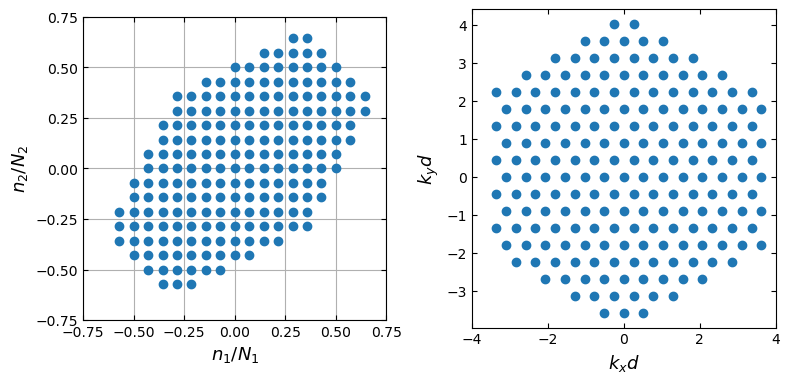

In [145]:
fig = plt.figure(figsize=[8,4], dpi=100)
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(n1_mesh_first_BZ, n2_mesh_first_BZ,zorder=1)
ax1.set_aspect('equal')
ax1.set_xlabel(r'$n_1/N_1$', fontsize=13)
ax1.set_ylabel(r'$n_2/N_2$', fontsize=13)
ax1.xaxis.set_ticks(np.arange(-0.75,1,0.25))
ax1.yaxis.set_ticks(np.arange(-0.75,1,0.25))
ax1.set_axisbelow(True)

# ax1.yaxis.set_ticks([-2,-1,0,1,2])
ax1.tick_params(top=True,right=True,direction='in')
ax1.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(kx_mesh_first_BZ, ky_mesh_first_BZ)
ax2.set_aspect('equal')
ax2.set_xlabel(r'$k_x d$', fontsize=13)
ax2.set_ylabel(r'$k_y d$', fontsize=13)
ax2.set_xlim(-4,4)
ax2.tick_params(top=True,right=True,direction='in')

plt.tight_layout()

In [146]:
k_list_first_BZ = []
n_list_first_BZ = []

for i, comp in enumerate(zip(kx_mesh_first_BZ.reshape(-1), ky_mesh_first_BZ.reshape(-1), n1_mesh_first_BZ.reshape(-1), n2_mesh_first_BZ.reshape(-1))):
    if np.isnan(comp[0]) == False:
        k_list_first_BZ.append((comp[0],comp[1]))
        n_list_first_BZ.append((comp[2],comp[3]))

In [147]:
#Quasimomentum list
E = np.zeros([len(n_list_first_BZ), Nsite**2])
C0 = np.zeros([len(n_list_first_BZ), Nsite**2],dtype = 'complex_')
bloch_at_zero_list = np.zeros(len(n_list_first_BZ), dtype = 'complex_')
new_bloch_at_zero_list = np.zeros(len(n_list_first_BZ), dtype = 'complex_')

for i_n, n in enumerate(n_list_first_BZ):
    H = np.copy(H_tmp)
    K = 3 * ((n[0] + l1)**2 + (n[1] + m1)**2 - (n[0] + l2) * (n[1] + m2))
    H += ((l1 == l2) * (m1 == m2)) * K
    E0, P = np.linalg.eig(H)
    rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
    E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
    C0[i_n, :] = P[:,np.argmin(E0)]
    bloch_at_zero_list[i_n] = np.sum(P[:,np.argmin(E0)])
    if np.real(bloch_at_zero_list[i_n]) < 0:
        C0[i_n, :] = -C0[i_n, :]
        new_bloch_at_zero_list[i_n] = -bloch_at_zero_list[i_n]
    else:
        new_bloch_at_zero_list[i_n] = bloch_at_zero_list[i_n]

<ipython-input-147-b53876a0adcc>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))


In [148]:
E1st_list_first_BZ = []
E2nd_list_first_BZ = []
E3rd_list_first_BZ = []
new_bloch_at_zero_list_first_BZ = []
index = 0

for i, comp in enumerate(n1_mesh_first_BZ.reshape(-1)):
    if np.isnan(comp) == False:
        E1st_list_first_BZ.append(E[index,0])
        E2nd_list_first_BZ.append(E[index,1])
        E3rd_list_first_BZ.append(E[index,2])
        new_bloch_at_zero_list_first_BZ.append(new_bloch_at_zero_list[index])
        index += 1
    else:
        E1st_list_first_BZ.append(np.nan)
        E2nd_list_first_BZ.append(np.nan)
        E3rd_list_first_BZ.append(np.nan)
        new_bloch_at_zero_list_first_BZ.append(np.nan)

In [149]:
E1st_array_first_BZ = np.array(E1st_list_first_BZ).reshape(len(n1_list),len(n1_list))
E2nd_array_first_BZ = np.array(E2nd_list_first_BZ).reshape(len(n1_list),len(n1_list))
E3rd_array_first_BZ = np.array(E3rd_list_first_BZ).reshape(len(n1_list),len(n1_list))
new_bloch_at_zero_array_first_BZ = np.array(new_bloch_at_zero_list_first_BZ).reshape(len(n1_list),len(n1_list))

E1st_array_first_BZ_masked = np.ma.masked_invalid(E1st_array_first_BZ)
kx_mesh_first_BZ_masked = np.ma.masked_invalid(kx_mesh_first_BZ)
ky_mesh_first_BZ_masked = np.ma.masked_invalid(ky_mesh_first_BZ)
new_bloch_at_zero_array_first_BZ_masked = np.ma.masked_invalid(new_bloch_at_zero_array_first_BZ)

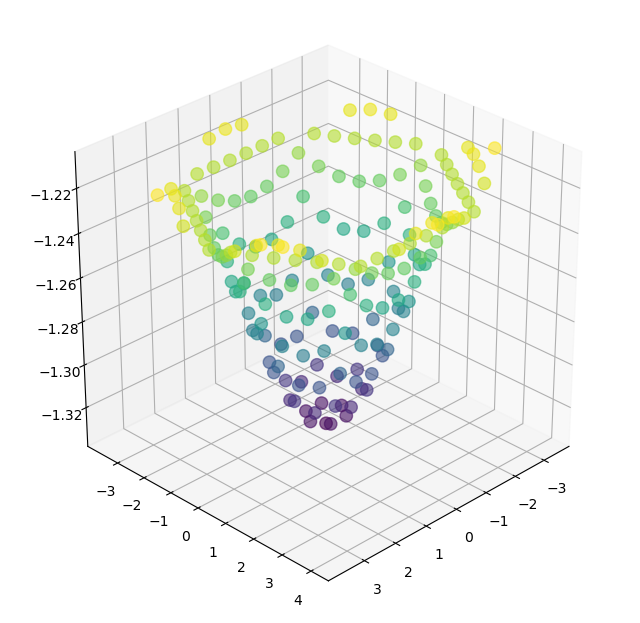

In [150]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8, 8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kx_mesh_first_BZ.reshape(-1), ky_mesh_first_BZ.reshape(-1), E1st_array_first_BZ.reshape(-1), c=E1st_array_first_BZ.reshape(-1), s=80, alpha=0.6)
# ax.scatter(kx_mesh_first_BZ.reshape(-1), ky_mesh_first_BZ.reshape(-1), E2nd_array_first_BZ.reshape(-1), c=E2nd_array_first_BZ.reshape(-1), s=80, alpha=0.6)
# ax.scatter(kx_mesh_first_BZ, ky_mesh_first_BZ, E2nd_array_first_BZ)
# ax.scatter(kx_mesh_first_BZ, ky_mesh_first_BZ, E3rd_array_first_BZ)
ax.view_init(30, 45)

plt.show()

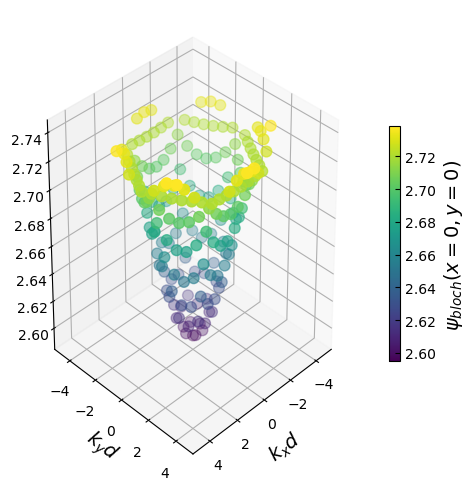

In [194]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (5, 5),dpi=100)
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(kx_mesh_first_BZ.reshape(-1), ky_mesh_first_BZ.reshape(-1), new_bloch_at_zero_array_first_BZ.real.reshape(-1),c=new_bloch_at_zero_array_first_BZ.real.reshape(-1),s=60,cmap='viridis')
ax.set_xlabel(r'$k_x d$',fontsize=14,labelpad=1)
ax.set_ylabel(r'$k_y d$',fontsize=14,labelpad=1)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.xaxis.set_ticks([-4,-2,0,2,4])
ax.yaxis.set_ticks([-4,-2,0,2,4])
ax.tick_params(axis='x', which='major', pad=0)
ax.view_init(30, 45)
divider1 = make_axes_locatable(ax)
cbar=fig.colorbar(scat,shrink = 0.5)
cbar.ax.tick_params(direction='in')
cbar.set_label(r"$\psi_{bloch}(x=0,y=0)$", fontname="Arial", fontsize=14)

plt.tight_layout()

In [152]:
l1_list = np.arange(Nsite)-(Nsite-1)/2
l2_list = l1_list
l1_mesh, l2_mesh = np.meshgrid(l1_list,l2_list)
l12_list = list(map(lambda l1,l2: (l2,l1) ,l1_mesh.reshape(-1), l2_mesh.reshape(-1)))

In [153]:
site = np.array([0,0])
grid = 0.05
x = np.arange(-2,2+grid,grid)
y = np.arange(-2,2+grid,grid)
X,Y = np.meshgrid(x,y)
C0_list=list(C0[n12,Nsite*l1+l2] for n12 in range(len(n_list_first_BZ)) for l1 in range(Nsite) for l2 in range(Nsite))
C0_list=np.reshape(C0_list, (len(n_list_first_BZ), Nsite,Nsite))

normalization_factor = np.sqrt(2/(np.sqrt(3)))/len(n_list_first_BZ)

import time
t1 = time.time()
wannier_list = list(map(lambda x,y: 
        np.sum(list(map(lambda n12: 
        np.sum(list(map(lambda l12: normalization_factor*C0[n12[0],l12[0]]*np.exp(4*np.pi/np.sqrt(3)*1.j*((n12[1][0]+l12[1][0])*x+(n12[1][1]+l12[1][1])*(-1/2*x+np.sqrt(3)/2*y)))
        , enumerate(l12_list))), axis=0)
        , enumerate(n_list_first_BZ))),axis=0)
        , X,Y))

# wannier_list = list(map(lambda x,y: np.sum(list(map(lambda n12: np.sum(list(map(lambda l1: np.sum(list(map(lambda l2: normalization_factor*C0_list[n12,l1,l2]*np.exp(4*np.pi/np.sqrt(3)*1.j*((n_list_first_BZ[n12][0]+l1)*x+(n_list_first_BZ[n12][1]+l2)*(-1/2*x+np.sqrt(3)/2*y))),range(Nsite))),axis=0), range(Nsite))), axis=0), range(len(n_list_first_BZ)))),axis=0), X,Y))
# wannier_list = list(map(lambda x,y: np.sum(list(map(lambda n12: np.sum(list(map(lambda l1: np.sum(list(map(lambda l2:  3/(np.sqrt(2)*3**(1/4))/len(n_list_first_BZ)*C0_list[n12,l1,l2]*np.exp(2*np.pi*1.j*((n_list_first_BZ[n12][0]+l1-(Nsite-1)/2)*(np.sqrt(3)*x)+(n_list_first_BZ[n12][1]+l2-(Nsite-1)/2)*(-np.sqrt(3)/2*x+3/2*y))),range(Nsite))),axis=0), range(Nsite))), axis=0), range(len(n_list_first_BZ)))),axis=0), X,Y))
t2 = time.time()
print('Elapsed time = {:.2f}[s]'.format(t2-t1))

Elapsed time = 97.19[s]


In [154]:
normcheck=np.sum(np.abs(wannier_list)**2)*grid**2
w4tri=np.sum(np.abs(wannier_list)**4*grid**2)/(normcheck**2)

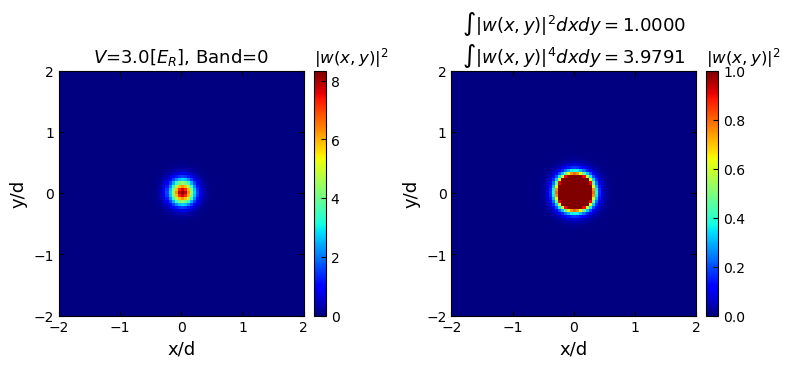

In [155]:
shifted_x = np.arange(-2, 2+grid, grid)
shifted_y = np.arange(-2, 2+grid, grid)
shifted_X, shifted_Y = np.meshgrid(shifted_x, shifted_y)

fig = plt.figure(figsize=[8,4], dpi=100)
ax1 = fig.add_subplot(1,2,1)
mappable1 = ax1.pcolormesh(shifted_X,shifted_Y,np.abs(wannier_list)**2, cmap='jet',vmin=0,vmax=np.max(np.abs(wannier_list)**2),shading='auto')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_aspect('equal')
ax1.set_xlabel(r'x/d', fontsize=13)
ax1.set_ylabel(r'y/d', fontsize=13)
ax1.tick_params(which='both',top='true', right='true', direction='in')
ax1.xaxis.set_ticks([-2,-1,0,1,2])
ax1.yaxis.set_ticks([-2,-1,0,1,2])
ax1.set_title(title+'={:.1f}[$E_R$]'.format(v)+', Band=%.d'%(band), fontsize=13)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.1)
pp=fig.colorbar(mappable1,cax=ax_cb1,orientation='vertical')
pp.ax.set_title(r"$|w(x,y)|^2$", loc='left')
pp.ax.tick_params(direction='in')


ax2 = fig.add_subplot(1,2,2)
mappable2 = ax2.pcolormesh(shifted_X,shifted_Y,np.abs(wannier_list)**2, cmap='jet',vmin=0,vmax=1,shading='auto')
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)
ax2.set_aspect('equal')
ax2.set_xlabel(r'x/d', fontsize=13)
ax2.set_ylabel(r'y/d', fontsize=13)
ax2.tick_params(which='both',top='true', right='true', direction='in')
ax2.xaxis.set_ticks([-2,-1,0,1,2])
ax2.yaxis.set_ticks([-2,-1,0,1,2])
ax2.set_title(r'$\int |w(x,y)|^2 dxdy=$%.04f'%(normcheck)+'\n'+r'$\int |w(x,y)|^4 dxdy=$%.04f'%(w4tri), fontsize=13)
divider2 = make_axes_locatable(ax2)
ax_cb2 = divider2.append_axes("right",size="5%",pad=0.1)
pp=fig.colorbar(mappable2,cax=ax_cb2,orientation='vertical')
pp.ax.set_title(r"$|w(x,y)|^2$", loc='left')
pp.ax.tick_params(direction='in')


plt.tight_layout()
# pp=plt.colorbar (orientation="vertical")
# pp.set_label(r"$|w(x,y)|^2$", fontsize=13)

In [197]:
29.531*3.9791*(3/2)**2/8.6061

30.7212680221006